# Introduction

*Safety Police*

> **Which neighborhood in Pittsburgh is the “best”?**

Here are our metrics:
- **Arrest:** measured by arrests per 1,000 residents  
- **Fire risk:** measured by the number of fire‐alarm incidents  
- **Life expectancy:** measured by median age at death  

---

# The Metric

We took a **combined score** on a scale from **0 – 30**, made up of three sub‐scores (each 0 – 10):

| Sub‐Metric         | How Measured                 | Better When…                |
|--------------------|------------------------------|-----------------------------|
| **Age Score**      | Median age at death (years)  | higher age → higher score   |
| **Fire Score**     | Total fire alarms            | fewer alarms → higher score |
| **Arrest Score**   | Arrests per 1,000 residents  | fewer arrests → higher score|

---

# The Best Neighborhood

Below is our full ranking of Pittsburgh’s neighborhoods by combined score:

In [14]:
import pandas as pd

# load all metrics
df_age  = pd.read_csv('median_age_summary.csv')
df_fire = pd.read_csv('fire_incidents_summary.csv')
df_arr  = pd.read_csv('arrest_summary.csv')

# neighborhoods strings match
for df in (df_age, df_fire, df_arr):
    df['neighborhood'] = (
        df['neighborhood']
          .astype(str)
          .str.strip()
          .str.lower()
    )

# merge neighborhoods
combined = (
    df_age
      .merge(df_fire, on='neighborhood', how='inner')
      .merge(df_arr,  on='neighborhood', how='inner')
)

# total score
combined['total_score'] = (
      combined['age_score']
    + combined['fire_score']
    + combined['arrest_score']
)

combined['neighborhood'] = (
    combined['neighborhood']
      .str.strip()     
      .str.title()
)

# sort vals
combined = combined.sort_values('total_score', ascending=False).reset_index(drop=True)
combined.index += 1

# ranking
print("\ntop 10 neighborhoods:")
print(combined[['neighborhood','age_score','fire_score','arrest_score','total_score']].head(10).to_string())

# best neighborhood
best = combined.iloc[0]
print(f"\nThe best neighborhood overall is {best['neighborhood']} "
      f"with a combined score of {best['total_score']:.2f}/30.")


top 10 neighborhoods:
           neighborhood  age_score  fire_score  arrest_score  total_score
1        Swisshelm Park   9.226994    9.661836          9.31    28.198830
2         New Homestead   9.309816    9.855072          8.60    27.764888
3         Regent Square   7.460123    9.855072          8.88    26.195195
4            Banksville   9.889571    8.647343          7.31    25.846914
5          Point Breeze   9.779141    7.971014          7.89    25.640156
6       Stanton Heights   8.509202    8.309179          8.17    24.988381
7           Morningside   7.763804    9.371981          7.82    24.955784
8               Oakwood   8.039877    9.613527          6.99    24.643404
9           Summer Hill   7.901840    9.565217          7.11    24.577058
10  Squirrel Hill North   9.751534    4.685990         10.00    24.437524

The best neighborhood overall is Swisshelm Park with a combined score of 28.20/30.


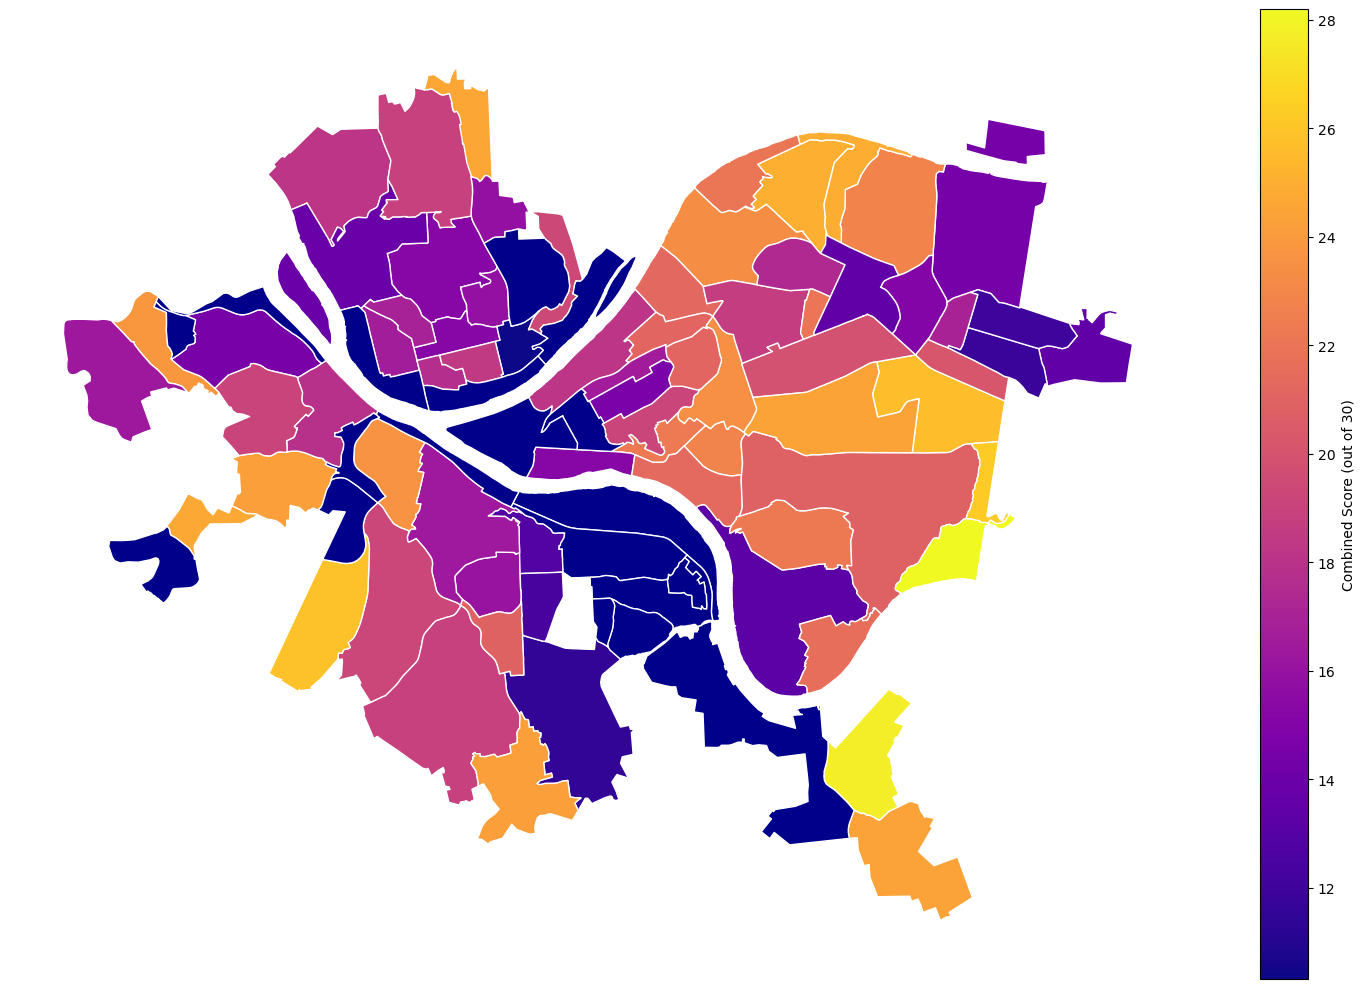

In [39]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

map_df = hoods.merge(
    combined[["neighborhood_key","total_score"]],
    left_on="hood_key",
    right_on="neighborhood_key",
    how="left"
)

fig, ax = plt.subplots(figsize=(15, 10))
map_df.plot(
    column="total_score",            
    cmap="plasma",                 
    edgecolor="white",                
    legend=True,                      
    legend_kwds={"label": "Combined Score (out of 30)"}, 
    ax=ax,
    missing_kwds={"color": "darkblue"} # set disctricts with no data to gray
)

ax.axis("off")
plt.tight_layout()
plt.show()

# Conclusion

**Reflections:**

**Elese Marie Zukina:**
> My personal favorite neighborhood is Squirrel Hill. Although it didn’t claim the top spot in our combined ranking, it is a great place to hang out and enjoy fun activities.